# 1.1 First order reaction in a batch reactor

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': "{0:0.9f}".format})

def reaction(t, c, kr): 
    f = -kr*c
    return f

kr = 1.0           # first order reaction rate constant [1/s]
c0 = 1.0           # initial concentration [mol/m3]
t_end = 2.0        # end time [s]
dt = 0.1           # time step [s]

## a) Forward Euler Discretization

t: 0.0000, c: 1.000000000000
t: 0.1000, c: 0.900000000000
t: 0.2000, c: 0.810000000000
t: 0.3000, c: 0.729000000000
t: 0.4000, c: 0.656100000000
t: 0.5000, c: 0.590490000000
t: 0.6000, c: 0.531441000000
t: 0.7000, c: 0.478296900000
t: 0.8000, c: 0.430467210000
t: 0.9000, c: 0.387420489000
t: 1.0000, c: 0.348678440100
t: 1.1000, c: 0.313810596090
t: 1.2000, c: 0.282429536481
t: 1.3000, c: 0.254186582833
t: 1.4000, c: 0.228767924550
t: 1.5000, c: 0.205891132095
t: 1.6000, c: 0.185302018885
t: 1.7000, c: 0.166771816997
t: 1.8000, c: 0.150094635297
t: 1.9000, c: 0.135085171767


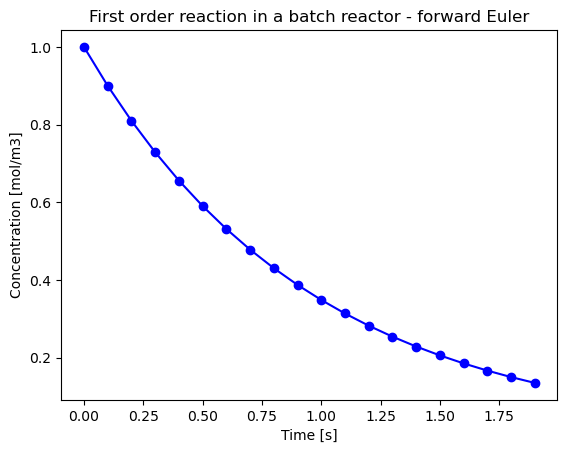

In [2]:
t = 0
c = c0
print(f"t: {t:.4f}, c: {c:.12f}")

t_plot = t
c_plot = c

while True:
    t_old = t
    c_old = c  
    t += dt
    if t>t_end:
        break
    
    c = c_old + dt*reaction(t_old, c_old, kr)
    
    print(f"t: {t:.4f}, c: {c:.12f}")
    t_plot = np.append(t_plot, t)
    c_plot = np.append(c_plot, c)
        
plt.plot(t_plot, c_plot, 'bo-')
plt.title('First order reaction in a batch reactor - forward Euler')
plt.xlabel('Time [s]')
plt.ylabel('Concentration [mol/m3]')
plt.show()

## b) Backward Euler Discretization

t: 0.0000, c: 1.000000000000
t: 0.1000, c: 0.909090909090
t: 0.2000, c: 0.826446280991
t: 0.3000, c: 0.751314800901
t: 0.4000, c: 0.683013455365
t: 0.5000, c: 0.620921323059
t: 0.6000, c: 0.564473930054
t: 0.7000, c: 0.513158118231
t: 0.8000, c: 0.466507380210
t: 0.9000, c: 0.424097618373
t: 1.0000, c: 0.385543289430
t: 1.1000, c: 0.350493899482
t: 1.2000, c: 0.318630817710
t: 1.3000, c: 0.289664379737
t: 1.4000, c: 0.263331254306
t: 1.5000, c: 0.239392049369
t: 1.6000, c: 0.217629135790
t: 1.7000, c: 0.197844668900
t: 1.8000, c: 0.179858789909
t: 1.9000, c: 0.163507990826


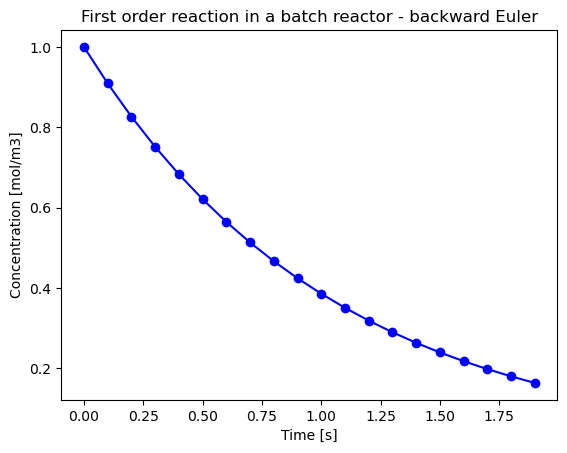

In [3]:
t = 0.0
c = c0
print(f"t: {t:.4f}, c: {c:.12f}")

t_plot = t
c_plot = c

while True:
    t_old = t
    c_old = c
    t += dt
    if t>t_end:
        break
    
    h = 1e-6
    f = reaction(t_old, c_old, kr)
    fh = reaction(t_old, c_old+h, kr)
    dfdc = (fh - f)/h
    
    c = c_old + dt*f/(1 - dt*dfdc)

    print(f"t: {t:.4f}, c: {c:.12f}")
    t_plot = np.append(t_plot, t)
    c_plot = np.append(c_plot, c)
        
plt.plot(t_plot, c_plot, 'bo-')
plt.title('First order reaction in a batch reactor - backward Euler')
plt.xlabel('Time [s]')
plt.ylabel('Concentration [mol/m3]')
plt.show()

## c) Using scipy.integrate.solve_ivp

t: 0.0000, c: 1.000000000000
t: 0.1000, c: 0.904837418334
t: 0.2000, c: 0.818641157862
t: 0.3000, c: 0.740558241899
t: 0.4000, c: 0.669916784661
t: 0.5000, c: 0.606072098646
t: 0.6000, c: 0.548406694626
t: 0.7000, c: 0.496330281649
t: 0.8000, c: 0.449279767039
t: 0.9000, c: 0.406719256395
t: 1.0000, c: 0.368140053592
t: 1.1000, c: 0.333102093212
t: 1.2000, c: 0.301353955299
t: 1.3000, c: 0.272625107923
t: 1.4000, c: 0.246651402065
t: 1.5000, c: 0.223181320891
t: 1.6000, c: 0.201975979750
t: 1.7000, c: 0.182809126174
t: 1.8000, c: 0.165467139882
t: 1.9000, c: 0.149749032774
t: 2.0000, c: 0.135498699488


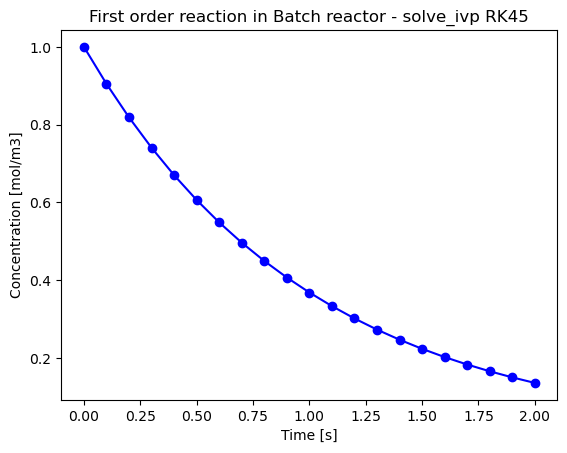

In [4]:
from scipy.integrate import solve_ivp

t_span = [0, t_end]
t_eval = np.linspace(0, t_end, 21)
sol = solve_ivp(lambda t, c: reaction(t, c, kr), t_span, [c0], method='RK45', t_eval = t_eval)

for t, y in zip(sol.t, sol.y[0]):
    print(f"t: {t:.4f}, c: {y:.12f}")

plt.plot(sol.t, sol.y[0], 'bo-')
plt.title('First order reaction in Batch reactor - solve_ivp RK45')
plt.xlabel('Time [s]')
plt.ylabel('Concentration [mol/m3]')
plt.show()
